In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc
import mudata 
import matplotlib.pyplot as plt
import seaborn as sns

# Description:

This notebook is used to perform GRN analysis.

In [2]:
e_direct = pd.read_csv('/home/rsun@ZHANGroup.local/sly_data/sly_07_exfig/global_grn/scplus_pipeline/Snakemake/eRegulon_direct.tsv', sep='\t')
e_direct.loc[:,'eRegulon_name'].unique().shape

(132,)

In [3]:
auc_direct = mudata.read('/home/rsun@ZHANGroup.local/sly_data/sly_07_exfig/global_grn/scplus_pipeline/Snakemake/AUCell_direct.h5mu')
auc_direct

/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/rsun@ZHANGroup.local/anaconda3/envs/snapatac/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 295888 × 264
  2 modalities
    Gene_based:	295888 x 132
    Region_based:	295888 x 132

In [4]:
cell_data = pd.read_csv('/home/rsun@ZHANGroup.local/sly_data/sly_07_exfig/global_grn/scenic_brain_out/cell_data.csv', index_col = 0)
cell_data

,species,tissues,samples,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cluster,celltype,coarse_celltype
AAACAGCCAAACGGGC-1_CYBQ,CY,BQ,CYBQ,1571,1571,2918.0,0.0,0.0,11,neuron,inhibitory neuron,inhibitory neuron
AAACAGCCAACTAACT-1_CYBQ,CY,BQ,CYBQ,1138,1138,1802.0,0.0,0.0,0,neuron,excitatory neuron,excitatory neuron
AAACAGCCACAGCCTG-1_CYBQ,CY,BQ,CYBQ,1673,1673,3527.0,0.0,0.0,15,neuron,excitatory neuron,excitatory neuron
AAACAGCCACCATATG-1_CYBQ,CY,BQ,CYBQ,1172,1172,2230.0,0.0,0.0,11,neuron,inhibitory neuron,inhibitory neuron
AAACAGCCATCATGTG-1_CYBQ,CY,BQ,CYBQ,2026,2026,5842.0,0.0,0.0,11,neuron,inhibitory neuron,inhibitory neuron
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTAGCGTG-1_TYB,T,YB,TYB,685,685,902.0,0.0,0.0,0,neuron,excitatory neuron,excitatory neuron
TTTGTTGGTACTTAGG-1_TYB,T,YB,TYB,1923,1923,3784.0,0.0,0.0,11,neuron,inhibitory neuron,inhibitory neuron
TTTGTTGGTTGTCATC-1_TYB,T,YB,TYB,2547,2547,6929.0,0.0,0.0,0,neuron,excitatory neuron,excitatory neuron
TTTGTTGGTTTATCTG-1_TYB,T,YB,TYB,2526,2526,6020.0,0.0,0.0,15,neuron,excitatory neuron,excitatory neuron


In [6]:
scdata = auc_direct['Gene_based'] 
scdata.obs = cell_data.loc[scdata.obs.index,:]
scdata.obs

,species,tissues,samples,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cluster,celltype,coarse_celltype
Cell,,,,,,,,,,,,
GTAAGCTTCATTTGCT-1_QFQN,QF,QN,QFQN,2500,2499,8128.0,0.0,0.0,1,neuron,inhibitory neuron,inhibitory neuron
CCAGGAACAAACCTAT-1_CYPC,CY,PC,CYPC,823,823,1200.0,0.0,0.0,2,neuron,excitatory neuron,excitatory neuron
ATTTAGGTCTCCATAT-1_JTCT,JT,CT,JTCT,557,557,764.0,0.0,0.0,6,neuron,excitatory neuron,excitatory neuron
CCGTTACTCCGCACAA-1_MQN,M,QN,MQN,537,537,810.0,0.0,0.0,3,oligodendrocyte,oligodendrocyte,non neuron
TGTTATGAGGATTGCT-1_JTHM,JT,HM,JTHM,2315,2315,6238.0,0.0,0.0,2,neuron,excitatory neuron,excitatory neuron
...,...,...,...,...,...,...,...,...,...,...,...,...
ACGTTGTAGCGCTCAA-1_JTHM,JT,HM,JTHM,1789,1789,3934.0,0.0,0.0,2,neuron,excitatory neuron,excitatory neuron
TGAGTTTCAATCCTAG-1_MBQ,M,BQ,MBQ,1043,1043,1970.0,0.0,0.0,0,neuron,excitatory neuron,excitatory neuron
AAGCCTCCAACCTGGT-1_CYHM,CY,HM,CYHM,2697,2697,8581.0,0.0,0.0,2,neuron,excitatory neuron,excitatory neuron


## get TF expression data

In [18]:
exp_data = sc.read_h5ad('/home/rsun@ZHANGroup.local/cross_embed/data/species_raw.h5ad')
new_idx = []
for ele in exp_data.obs.index:
    a, b, c = ele.split('-')
    new_idx.append(b + '-' + c +  '_' + a)
exp_data.obs.index = new_idx 

exp_data = exp_data[scdata.obs.index,:]
assert (exp_data.obs.index == scdata.obs.index).all()

## Only save eRegulon with '+/+' and '-/-

In [8]:
module_list = []
sel_idx = []
for ele in scdata.var.index:
    a,b,c,d = ele.split('_')

    if c == '+/+':
        module_list.append(f'{a}(+)')
        sel_idx.append(True)
    elif c == '-/-':
        module_list.append(f'{a}(-)')
        sel_idx.append(True)
    else:
        sel_idx.append(False)
print(len(module_list)) 

scdata = scdata[:,sel_idx]
scdata.var.index = module_list 
#scdata.var

77


/tmp/ipykernel_1703972/846938510.py:17: ImplicitModificationWarning: Trying to modify index of attribute `.var` of view, initializing view as actual.
  scdata.var.index = module_list


In [9]:
from sklearn.preprocessing import StandardScaler
def _scale(X: pd.DataFrame) -> pd.DataFrame:
    return (X - X.min()) / (X.max() - X.min())

def z_scale(df):
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index = df.index)
    return df

def sum_scale(df):
    new_df = df / df.sum(axis = 0).values
    return new_df

In [10]:
import os 
save_dir = 'reg_plot'
os.makedirs(save_dir, exist_ok=True)

## Group the regulation based on species category 

generate a dataframe with size (species, eRegulation)

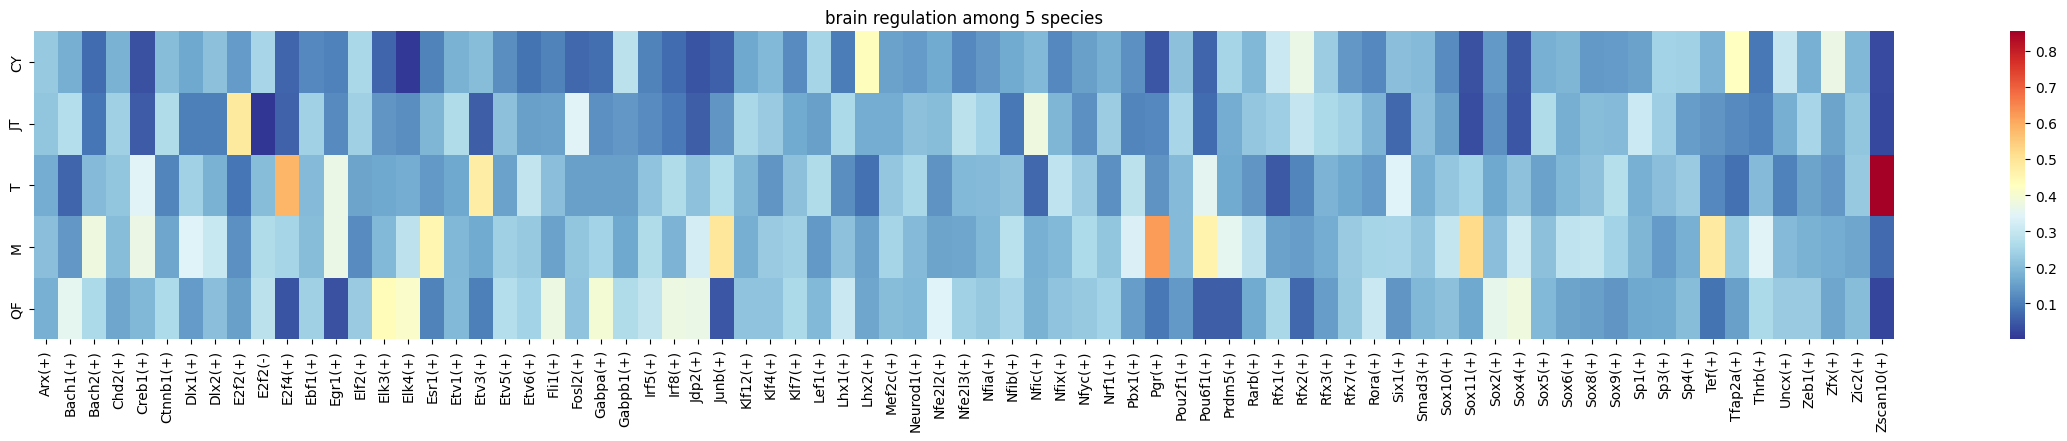

In [76]:
reg_dic = {}
for key in scdata.obs.species.unique():
    idx = scdata.obs.species == key
    tmp = scdata[idx,:].X.mean(axis = 0)
    reg_dic[key] = tmp 
reg_df = pd.DataFrame(reg_dic)

reg_df = reg_df.T
reg_df.columns = scdata.var.index
reg_df= reg_df.loc[['CY','JT','T','M','QF'],:]
reg_df = sum_scale(reg_df)

plt.figure(figsize = (30,4))
sns.heatmap(reg_df, cmap = 'RdYlBu_r')#, vmax = 0.5)
plt.title('brain regulation among 5 species')
plt.savefig(os.path.join(save_dir,'brain_regulation_5_species.png'), bbox_inches = 'tight')
plt.show()

## Group the regulation based on the celltype

generate a dataframe with size (celltype, eRegulon)

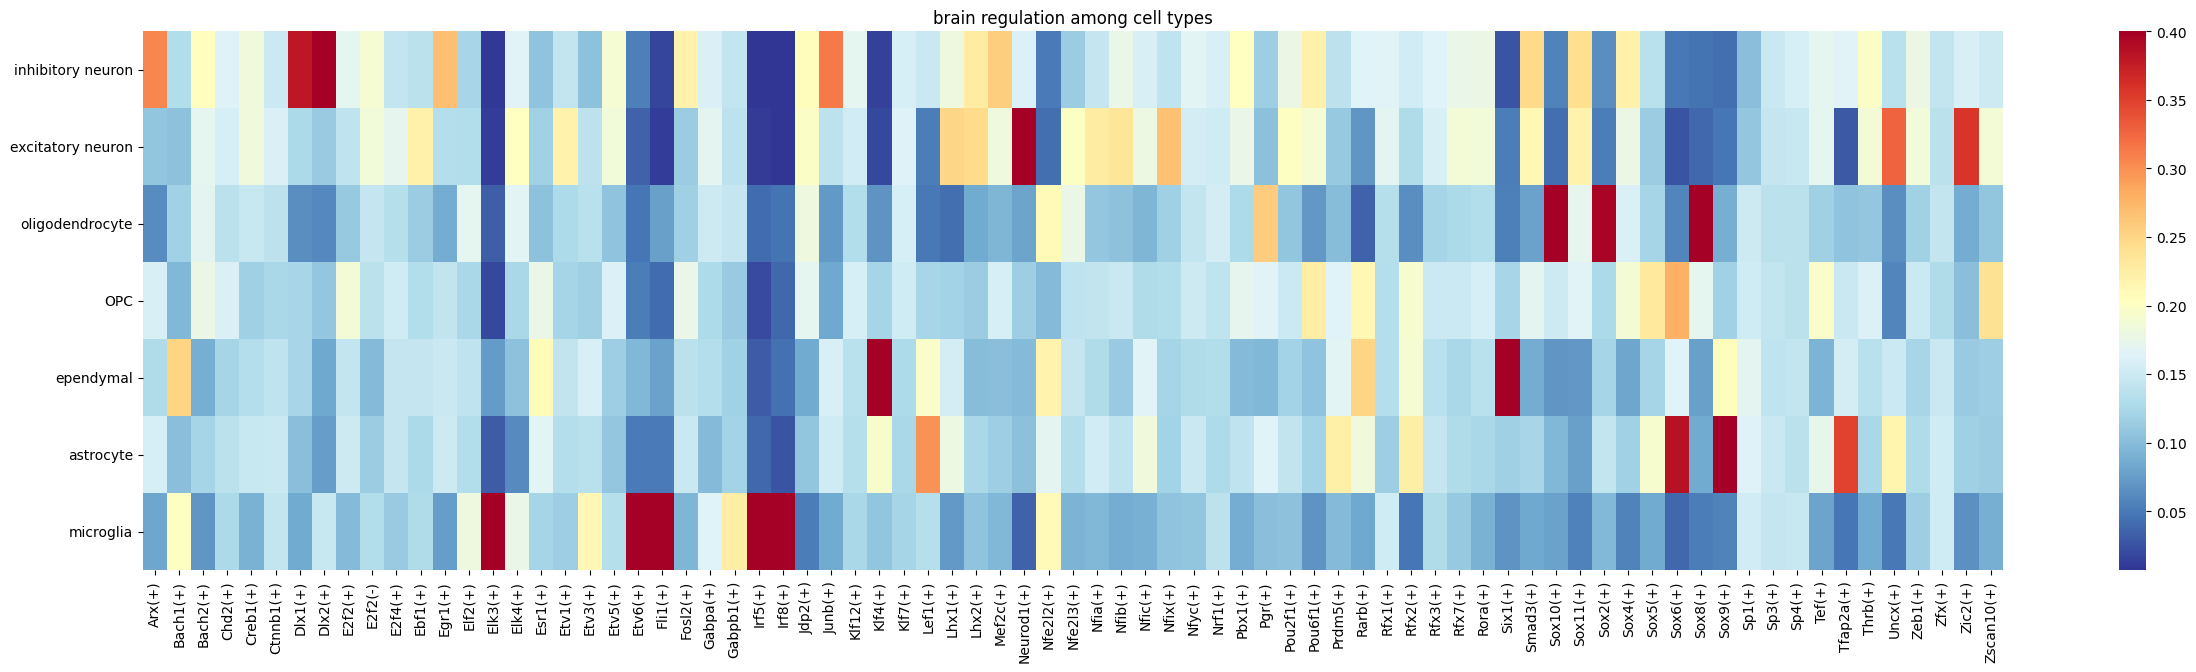

In [84]:
reg_dic = {}
for key in scdata.obs.celltype.unique():
    idx = scdata.obs.celltype == key
    tmp = scdata[idx,:].X.mean(axis = 0)
    reg_dic[key] = tmp 
reg_df = pd.DataFrame(reg_dic)


reg_df = reg_df.T
reg_df.columns = scdata.var.index
reg_df = sum_scale(reg_df)

plt.figure(figsize = (30,7))
sns.heatmap(reg_df, cmap = 'RdYlBu_r',vmax = 0.4)
plt.title('brain regulation among cell types')
plt.savefig(os.path.join(save_dir,'brain_regulation cell type.png'), bbox_inches = 'tight')
plt.show()

## Group the regulation based on the celltype category for each species 

generate 5 dataframe(5 speices), each df with shape (celltype, eRegulon)

In [12]:
save_dir = 'figures/speices_celltype'
os.makedirs(save_dir, exist_ok=True)

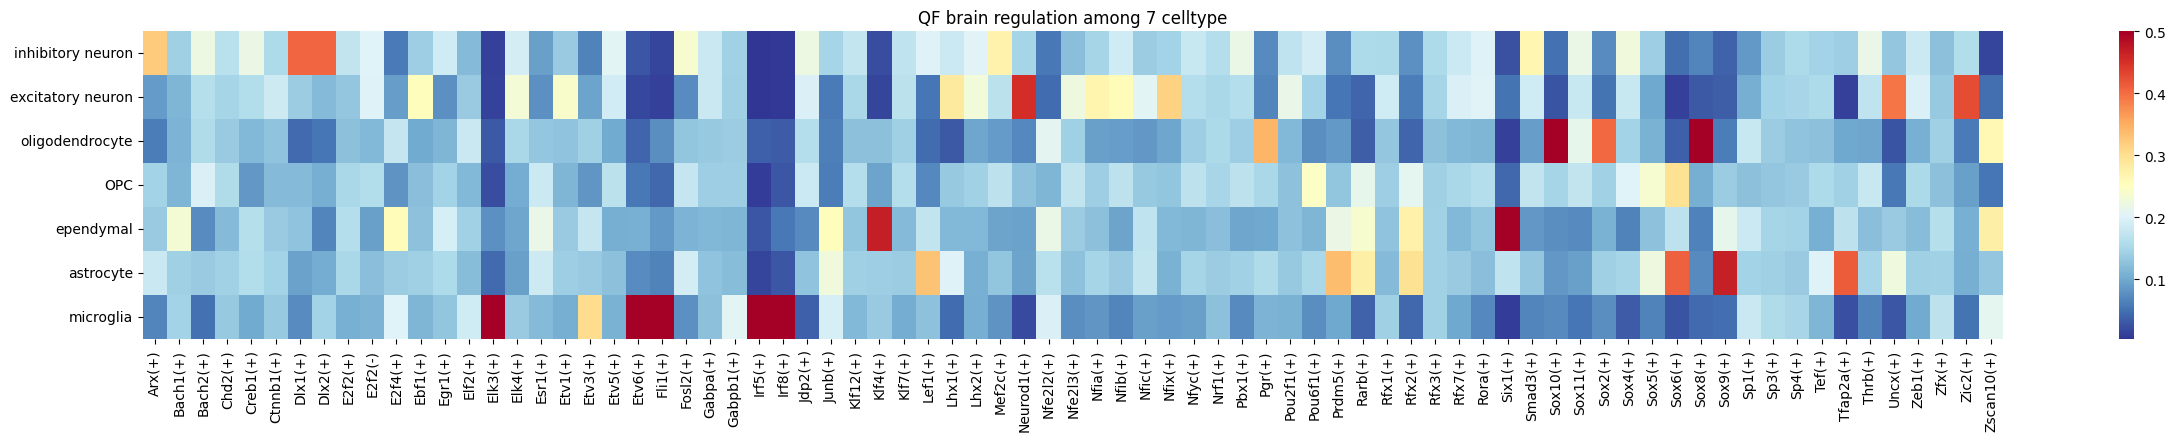

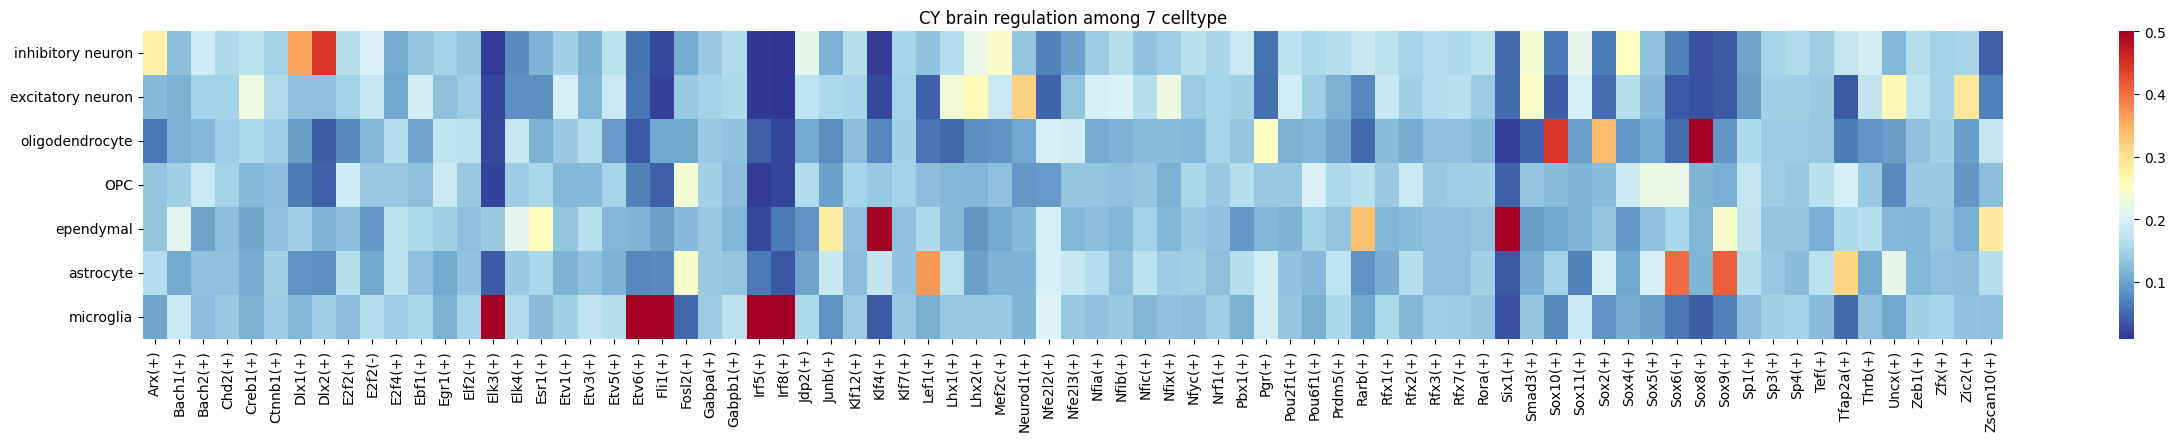

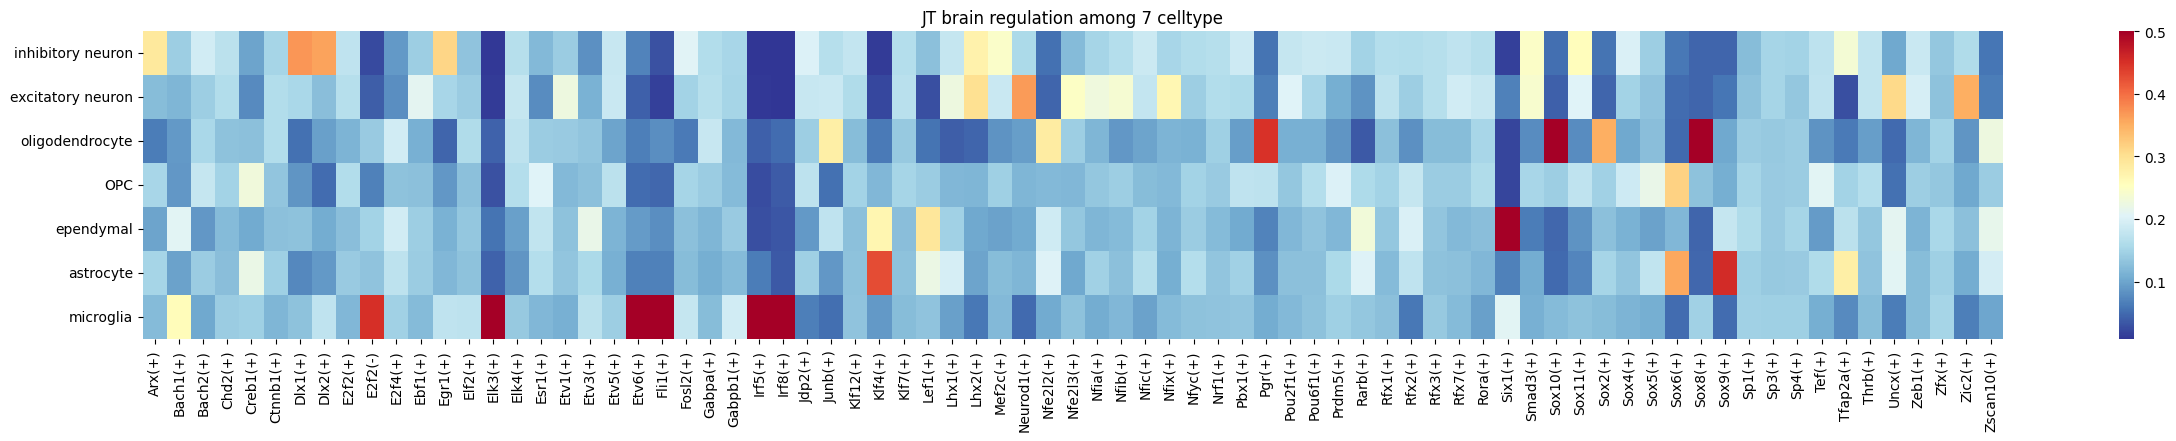

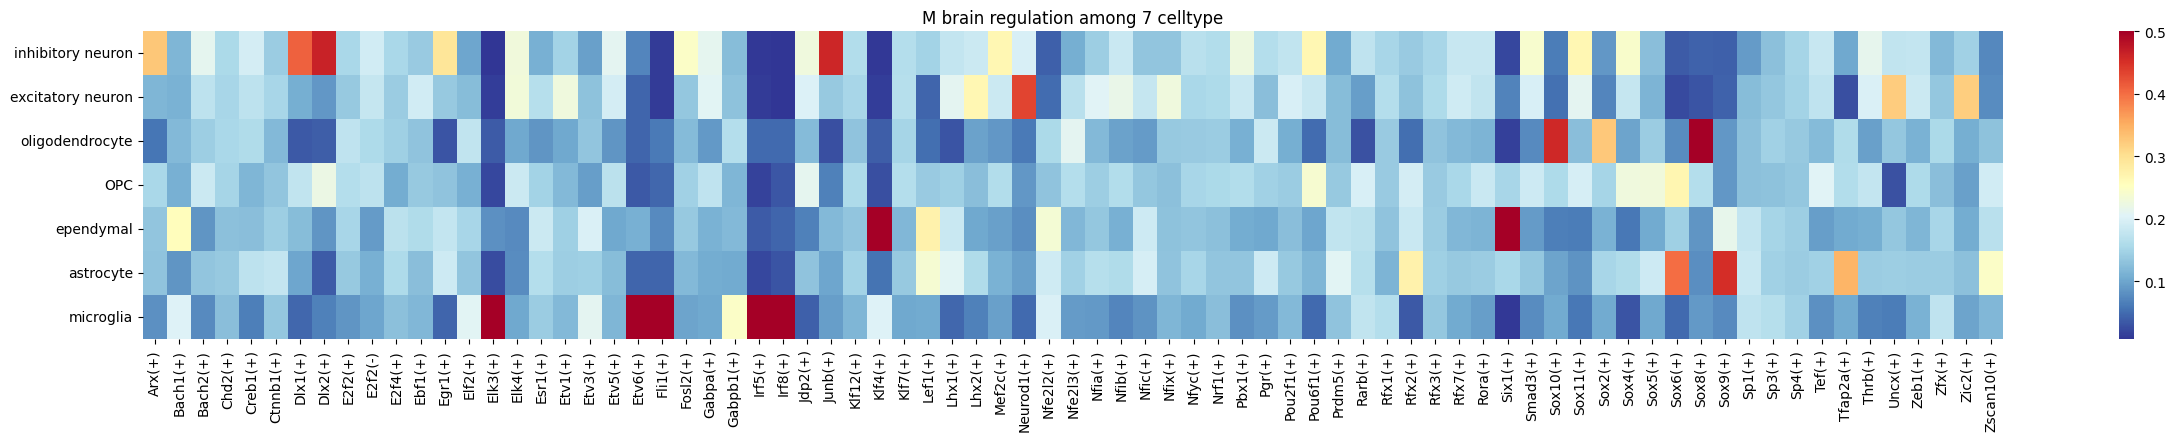

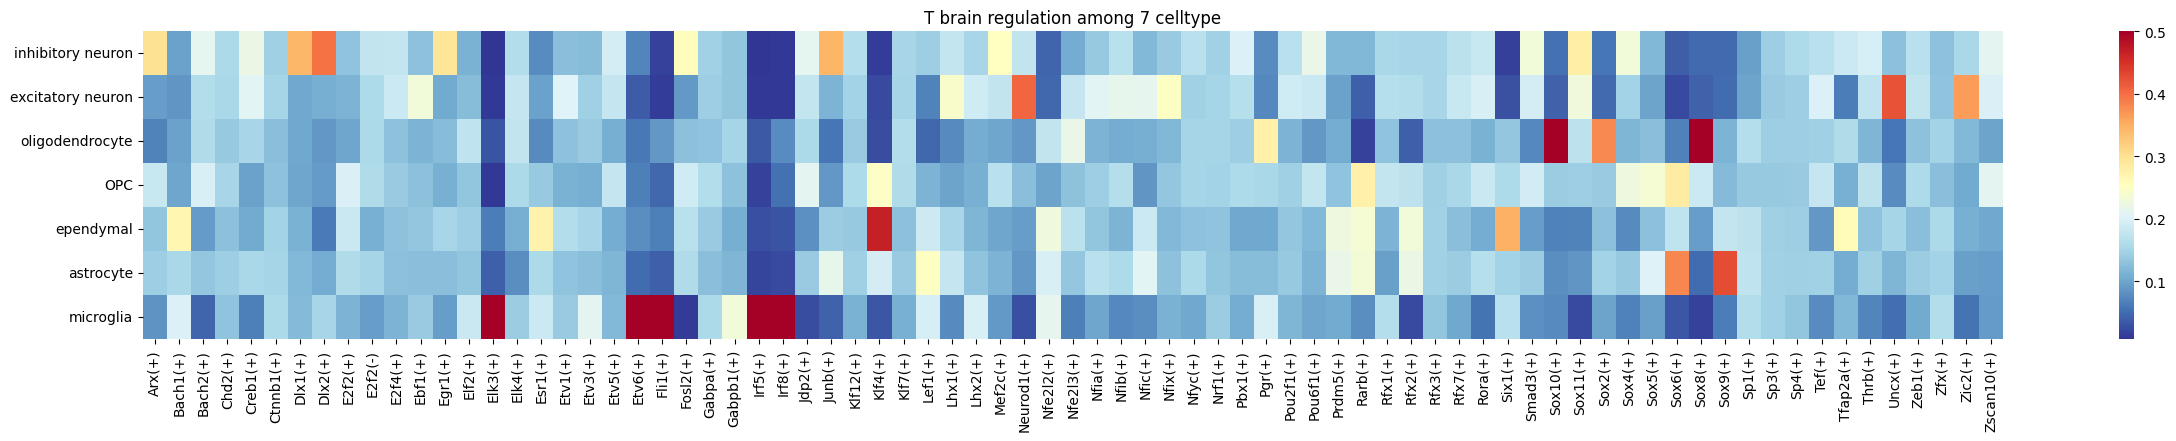

In [ ]:
reg_dic = {}
for key in scdata.obs.species.unique():
    species_res = {}
    idx = scdata.obs.species == key
    subdata = scdata[idx,:]
    
    for ele in subdata.obs.celltype.unique():
        idx2 = subdata.obs.celltype == ele
        tmp = subdata[idx2,:].X.mean(axis = 0)
        species_res[ele] = tmp
    reg_dic[key] = species_res


    reg_df = pd.DataFrame(species_res)

    reg_df = reg_df.T
    reg_df.columns = scdata.var.index
    reg_df= reg_df.loc[scdata.obs.celltype.unique(),:]
    reg_df = sum_scale(reg_df)

    plt.figure(figsize = (30,4))
    sns.heatmap(reg_df, cmap = 'RdYlBu_r', vmax = 0.5)
    plt.title(f'{key} brain regulation among 7 celltype')
    plt.savefig(os.path.join(save_dir,f'{key}_brain_regulation.png'), bbox_inches = 'tight')
    plt.show()

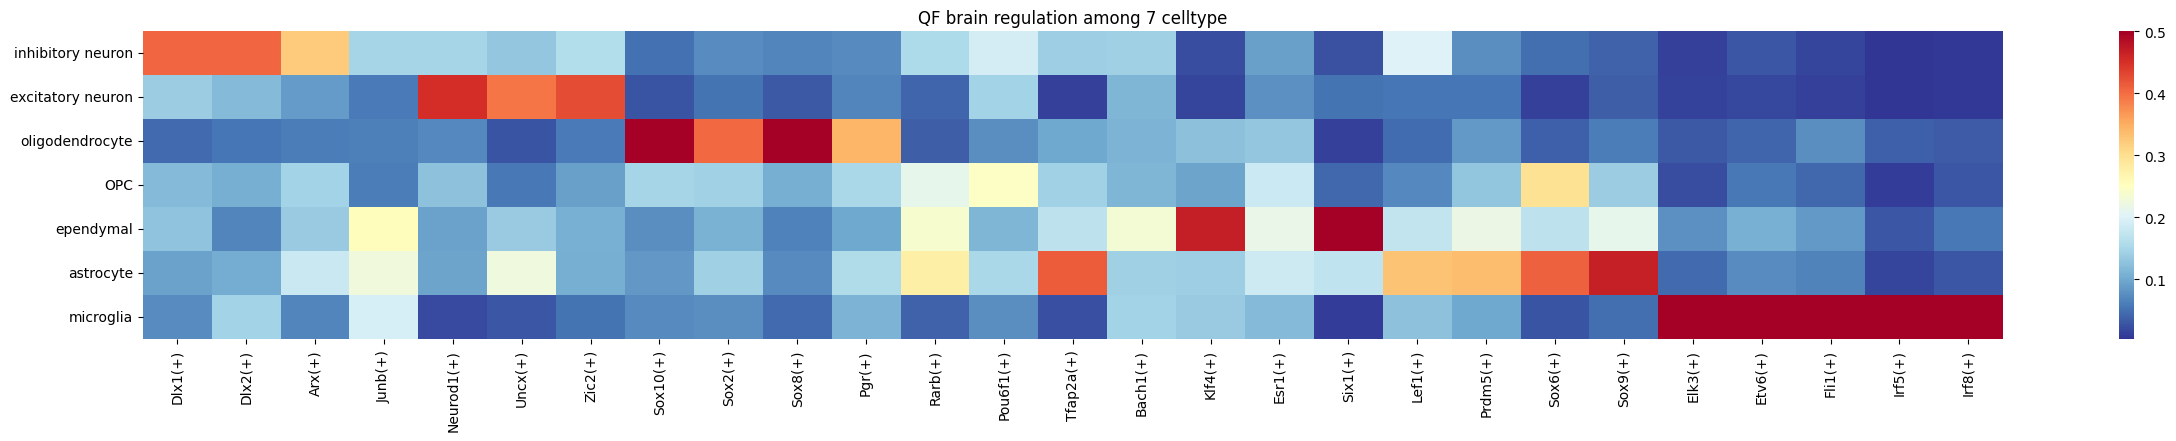

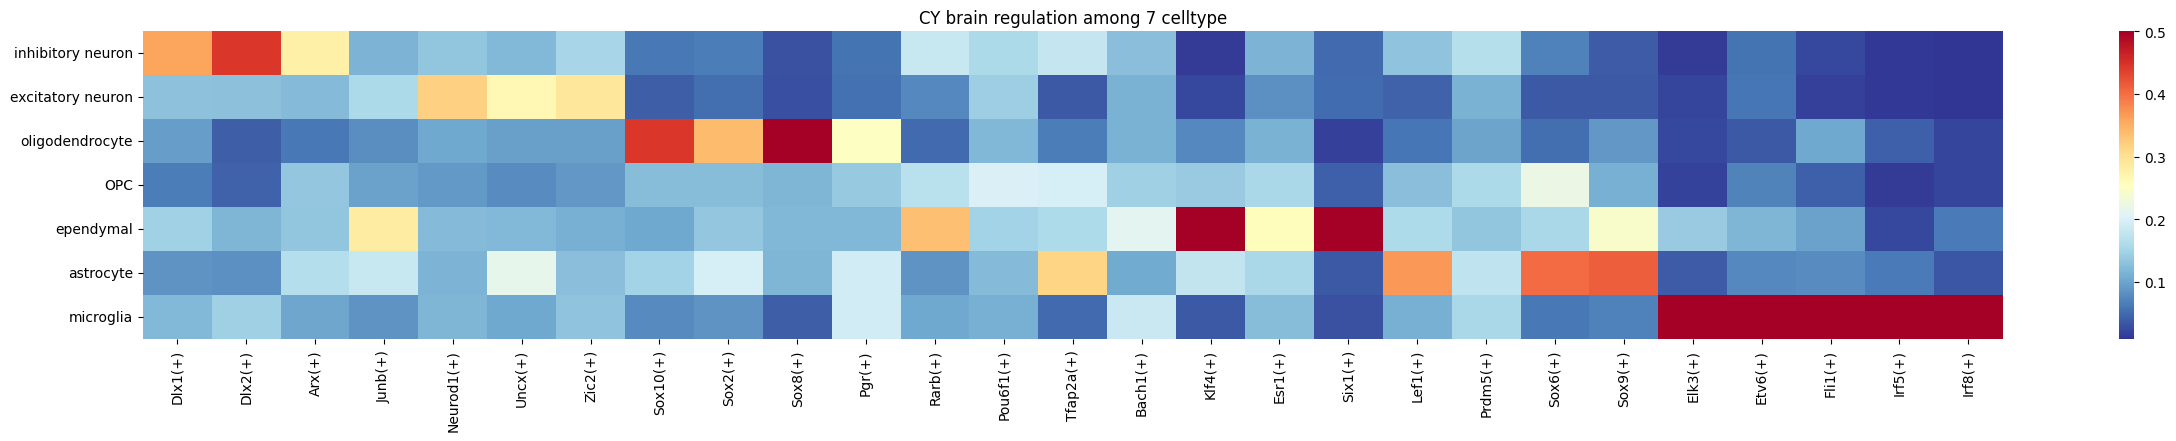

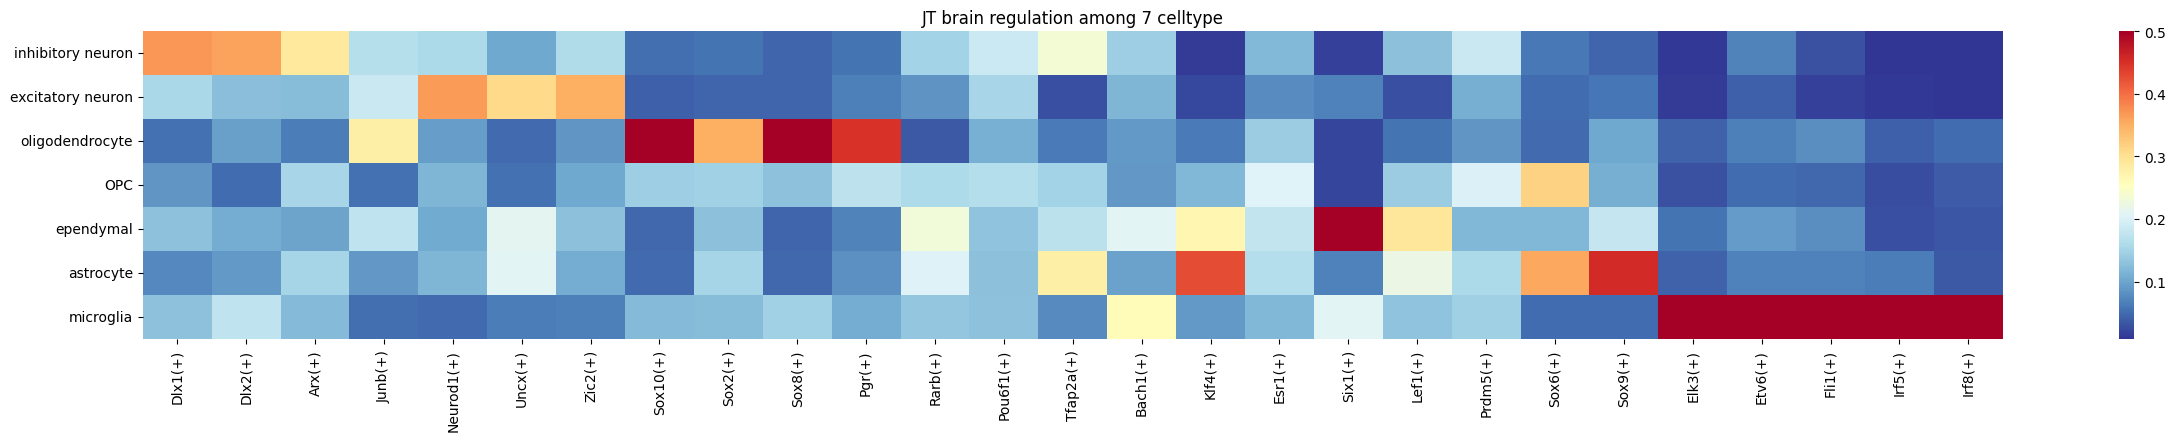

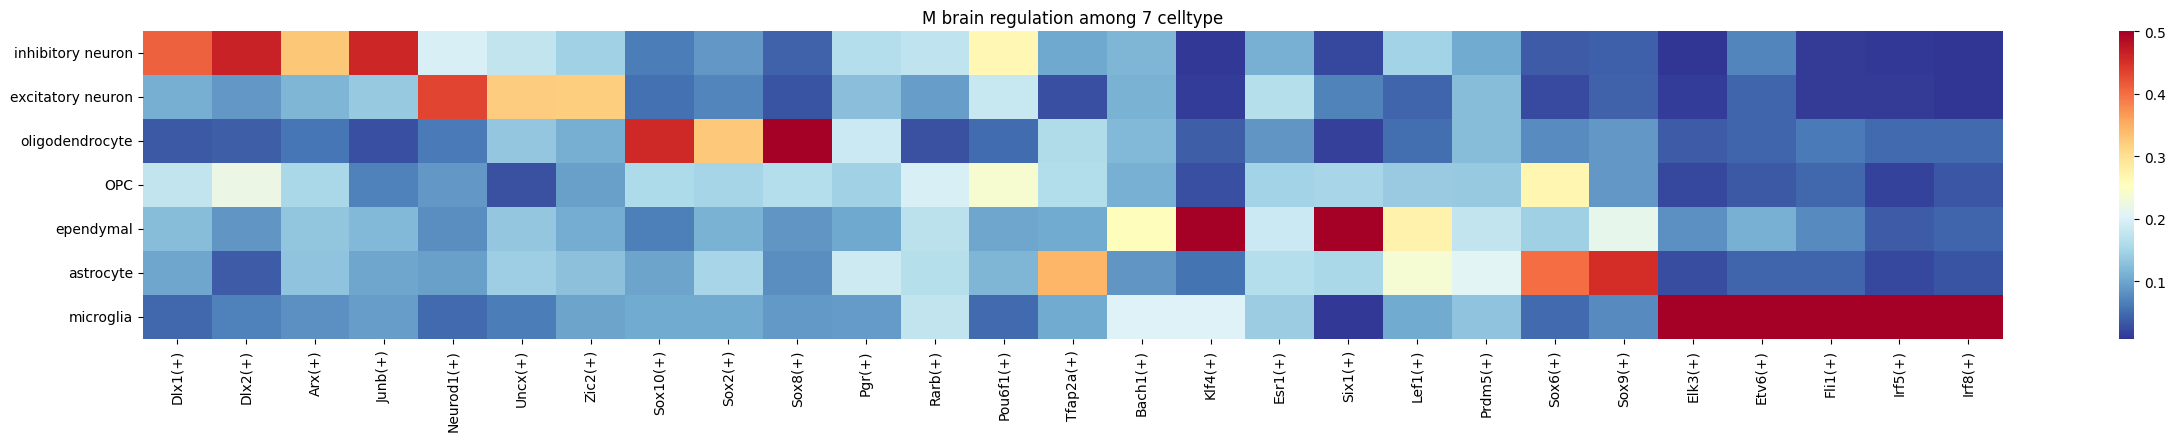

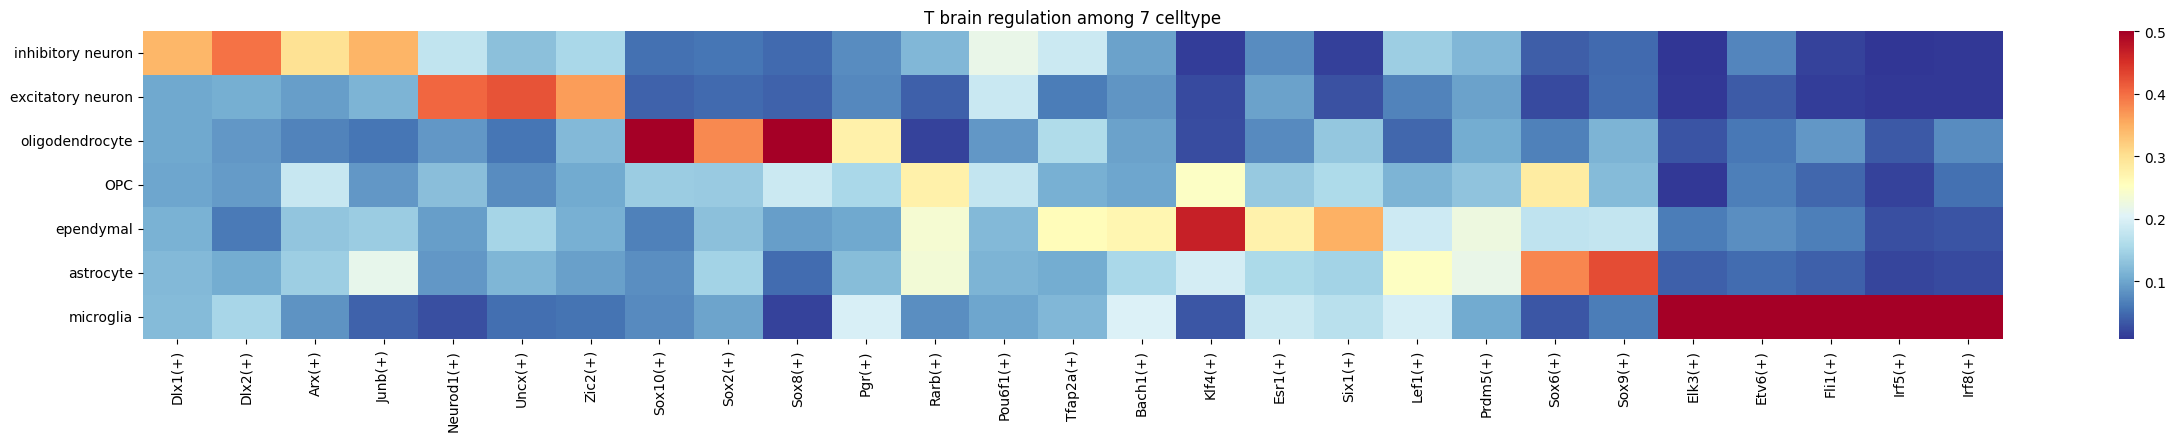

In [13]:
sel_tf = ['Dlx1(+)','Dlx2(+)','Arx(+)','Junb(+)','Neurod1(+)','Uncx(+)','Zic2(+)','Sox10(+)','Sox2(+)','Sox8(+)','Pgr(+)','Rarb(+)',
          'Pou6f1(+)','Tfap2a(+)','Bach1(+)','Klf4(+)','Esr1(+)','Six1(+)','Lef1(+)','Prdm5(+)','Sox6(+)','Sox9(+)','Elk3(+)',
          'Etv6(+)','Fli1(+)','Irf5(+)','Irf8(+)']

reg_dic = {}
for key in scdata.obs.species.unique():
    species_res = {}
    idx = scdata.obs.species == key
    subdata = scdata[idx,:]
    
    for ele in subdata.obs.celltype.unique():
        idx2 = subdata.obs.celltype == ele
        tmp = subdata[idx2,:].X.mean(axis = 0)
        species_res[ele] = tmp
    reg_dic[key] = species_res


    reg_df = pd.DataFrame(species_res)

    reg_df = reg_df.T
    reg_df.columns = scdata.var.index
    reg_df = reg_df.loc[:,sel_tf]
    reg_df= reg_df.loc[scdata.obs.celltype.unique(),:]
    reg_df = sum_scale(reg_df)

    plt.figure(figsize = (30,4))
    sns.heatmap(reg_df, cmap = 'RdYlBu_r', vmax = 0.5)
    plt.title(f'{key} brain regulation among 7 celltype')
    plt.savefig(os.path.join(save_dir,f'{key}_brain_regulation_filter.pdf'), bbox_inches = 'tight')
    plt.show() 

    reg_df.to_csv(os.path.join(save_dir, f'{key}_regulation.csv'))

### Show the celltype correlation based on the regulation score 

In [194]:
sel_tf = ['Dlx1(+)','Dlx2(+)','Arx(+)','Junb(+)','Neurod1(+)','Uncx(+)','Zic2(+)','Sox10(+)','Sox2(+)','Sox8(+)','Pgr(+)','Rarb(+)',
          'Pou6f1(+)','Tfap2a(+)','Bach1(+)','Klf4(+)','Esr1(+)','Six1(+)','Lef1(+)','Prdm5(+)','Sox6(+)','Sox9(+)','Elk3(+)',
          'Etv6(+)','Fli1(+)','Irf5(+)','Irf8(+)']

df_list = []
for species in reg_dic:
    df = pd.DataFrame(reg_dic[species])

    reg_df = df.T
    reg_df.columns = scdata.var.index
    reg_df = reg_df.loc[:,sel_tf]
    reg_df= reg_df.loc[scdata.obs.celltype.unique(),:]
    reg_df = sum_scale(reg_df)

    new_idx = [f'{species}_{x}' for x in reg_df.index]
    reg_df.index = new_idx
    df_list.append(reg_df)
df = pd.concat(df_list)
df[df >= 0.5] = 0.5
print(df.shape)

(35, 27)


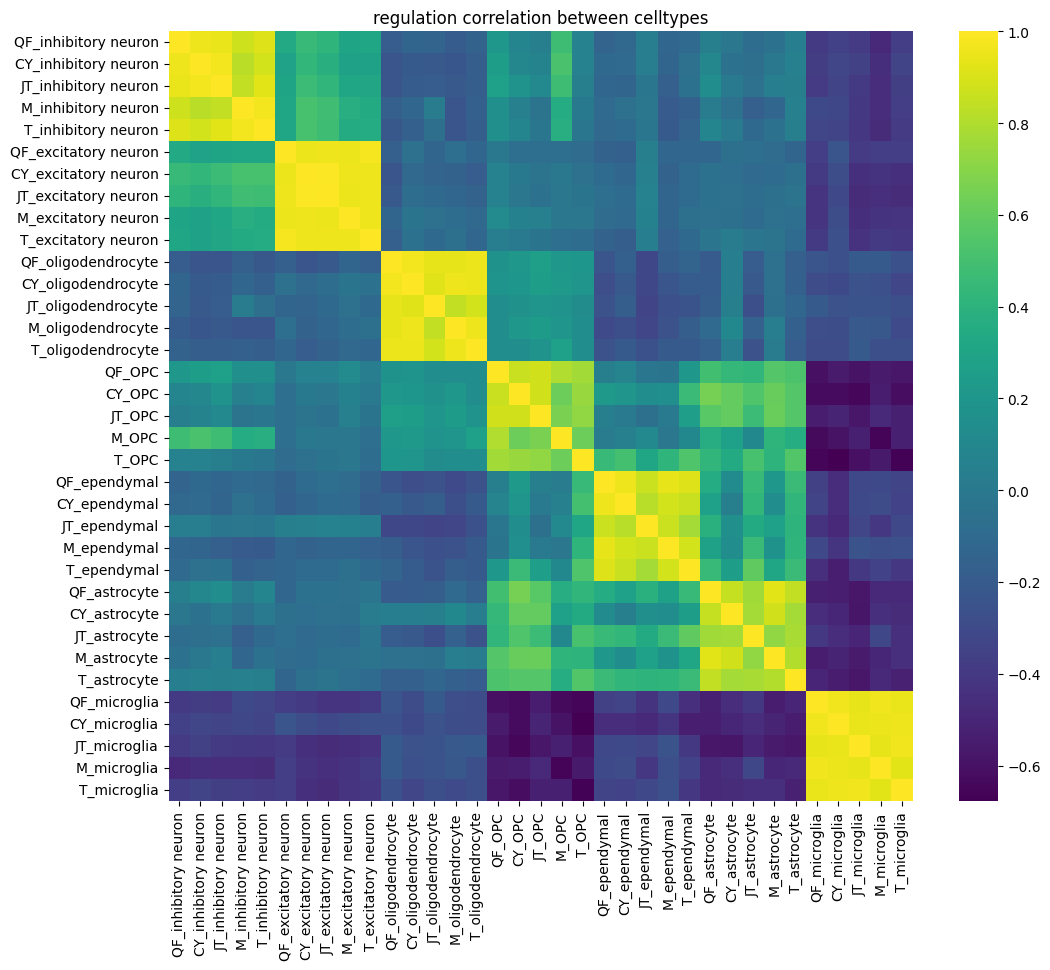

In [195]:
new_idx = []
for cell_type in scdata.obs.celltype.unique():
    for species in scdata.obs.species.unique():
        new_idx.append(species + '_' + cell_type)

df = df.loc[new_idx,:]

plt.figure(figsize=(12,10))
sns.heatmap(df.T.corr('pearson'),cmap = 'viridis')
plt.title('regulation correlation between celltypes')
plt.savefig('/home/rsun@ZHANGroup.local/sly_data/sly_07_exfig/global_grn/scenic_brain_out/figures/speices_celltype/regulation_corr.png', bbox_inches = 'tight')
plt.show()

## Quantify the echolocation difference amony 5 species in HM 


We quantify the echolocation difference using a metric like within-between variance. 

Suppose a cell cluster is relevant to the echolocation traits, we assume it is conserved in both echolocation species and non-echolocation species, and is different between the echolocation species and non-echolocation species. 

Therefore, we have the following metrics:

$ d_{eco,non-eco} = \frac{1}{N_{eco}*N_{non-eco}} \sum_{i\in eco} \sum_{j\in non-eco} ||x_i - x_j||^2 $

$ d_{eco,eco} = \frac{1}{N_{eco} *(N_{eco} - 1)} \sum_{(i,j)\in eco \;and\; i\neq j}  ||x_i - x_j||^2 $


$ d_{non-eco,non-eco} = \frac{1}{N_{non-eco} *(N_{non-eco} - 1)} \sum_{(i,j)\in non-eco \;and\;  i\neq j}  ||x_i - x_j||^2 $

$\delta = 2*d_{eco,non-eco} - d_{eco,eco} - d_{non-eco,non-eco}$ 


A larger $\delta$ indicates a larger difference between the eco and non-eco groups.

Here the $x_{i}$ is the mean cell embedding in a given cell group $i$. In order to quantify the difference from the regulation aspects, we chose the cell embedding as the eRegulon embedding generated by the scienplus.


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

def eval(df, n1=3):
    """
    将 df 分为前 n1 行和后 (len-n1) 行，计算三类距离
    """
    group1 = df.iloc[:n1]
    group2 = df.iloc[n1:]
    
    d1 = cdist(group1, group1, 'euclidean')[np.triu_indices(n1, k=1)]
    d2 = cdist(group2, group2, 'euclidean')
    d2 = [d2[0,1]] if d2.shape[0] == 2 else []
    d3 = cdist(group1, group2, 'euclidean').flatten()
    
    diff_score = 2*d3.mean() - (d2 + d1.mean())
    return diff_score

In [ ]:
df = pd.read_csv('/home/rsun@ZHANGroup.local/sly_data/sly_07_exfig/global_grn/scplus_pipeline/Snakemake/eRegulon_direct.tsv',sep = '\t')
df.loc[df.loc[:,'Gene'] == 'Otof',:]

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
906,chr5:30622388-30622888,Otof,0.044979,0.098455,0.004428,0.004428,Chd2,False,Chd2_direct_+/+,Chd2_direct_+/+_(339g),Chd2_direct_+/+_(338r),1.775837,1,0.157526,3503
1274,chr5:30461688-30462188,Otof,0.046892,0.125231,0.005872,0.005872,E2f2,False,E2f2_direct_+/+,E2f2_direct_+/+_(120g),E2f2_direct_+/+_(183r),1.133559,1,0.126991,20805
8477,chr5:30442060-30442560,Otof,0.054636,0.057710,0.003153,0.003153,Nrf1,False,Nrf1_direct_+/+,Nrf1_direct_+/+_(437g),Nrf1_direct_+/+_(570r),0.589776,1,0.131403,17146
10056,chr5:30763111-30763611,Otof,0.022891,0.064339,0.001473,0.001473,Rfx3,False,Rfx3_direct_+/+,Rfx3_direct_+/+_(885g),Rfx3_direct_+/+_(1340r),7.014522,1,0.275426,4780
10868,chr5:30763111-30763611,Otof,0.022891,0.064339,0.001473,0.001473,Rfx7,False,Rfx7_direct_+/+,Rfx7_direct_+/+_(722g),Rfx7_direct_+/+_(1072r),1.917196,1,0.125043,14665
12087,chr5:30626795-30627295,Otof,0.038211,0.066673,0.002548,0.002548,Smad3,False,Smad3_direct_+/+,Smad3_direct_+/+_(80g),Smad3_direct_+/+_(117r),0.409923,1,0.107728,21608
22842,chr5:30614198-30614698,Otof,0.022863,-0.081294,-0.001859,0.001859,Nfia,False,Nfia_direct_+/-,Nfia_direct_+/-_(197g),Nfia_direct_+/-_(238r),0.776279,1,0.089140,20595
22849,chr5:30751335-30751835,Otof,0.000210,-0.051246,-0.000011,0.000011,Nfia,False,Nfia_direct_+/-,Nfia_direct_+/-_(197g),Nfia_direct_+/-_(238r),0.776279,1,0.089140,29746


In [ ]:
save_dir = '/home/rsun@ZHANGroup.local/sly_data/sly_07_exfig/global_grn/scenic_brain_out/figures/region_regulation'
os.makedirs(save_dir, exist_ok=True)

In [ ]:
res_dic = {}


for tissue in scdata.obs.tissues.unique():
    tissue_res = {}
    for species in scdata.obs.species.unique():
        idx_1 = scdata.obs.tissues == tissue
        idx_2 = scdata.obs.species == species
        idx = idx_1 & idx_2
        tissue_res[species] = scdata[idx,:].X.mean(axis = 0)
    df = pd.DataFrame(tissue_res).T
    df.columns = scdata.var.index
    df = df.loc[['CY','JT','T','M','QF'],:]
    df = sum_scale(df)

    res_dic[tissue] = eval(df)[0]
for key in res_dic:
    print(key, res_dic[key])

QN 0.049264272433282574
PC 0.10961884106243369
CT 0.03222942231034143
HM 0.11671806803127494
NG 0.08997466503225748
BQ 0.08853011465380112
XQ 0.05212333412009462
YB 0.08677934040574087


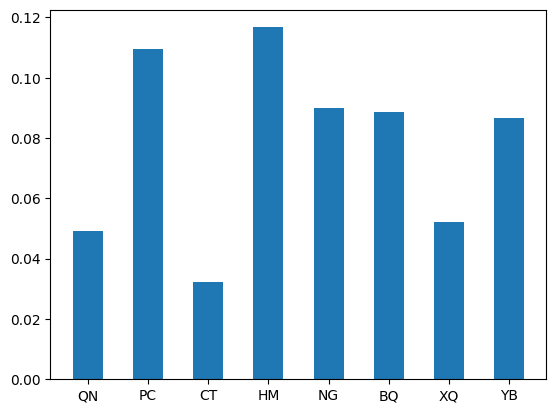

In [ ]:
plt.bar(list(res_dic.keys()), height = list(res_dic.values()), width = 0.5)
plt.show()